In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
%matplotlib inline

In [2]:
data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/DAAG/dengue.csv')
data=data.dropna()
print(data.keys())

Index(['Unnamed: 0', 'humid', 'humid90', 'temp', 'temp90', 'h10pix',
       'h10pix90', 'trees', 'trees90', 'NoYes', 'Xmin', 'Xmax', 'Ymin',
       'Ymax'],
      dtype='object')


In [3]:
nombres=['humid', 'temp', 'h10pix', 'trees', 'Xmin', 'Ymin']
data1=np.array(data[nombres])

In [4]:
score=[]
for i in range(10):
    kmeans = KMeans(n_clusters=i+1).fit(data1)
    score.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

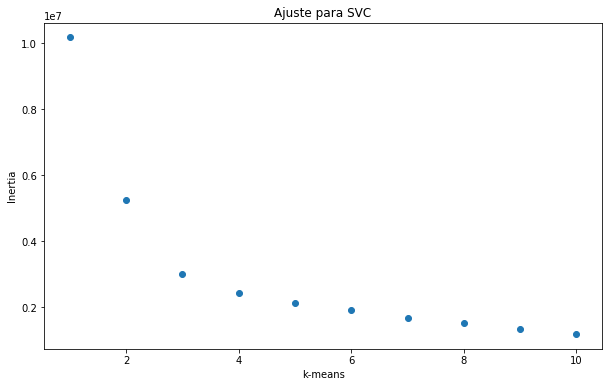

In [5]:
c1=np.arange(1,11)
plt.figure(figsize=(10,6))
plt.title("Ajuste para SVC")
plt.scatter(c1, score)
plt.xlabel("k-means")
plt.ylabel("Inertia")

In [6]:
print('Transacciones')

Transacciones


In [11]:
data = pd.read_csv('BreadBasket_DMS.csv')
data=data.dropna()
print(data.keys())

Index(['Date', 'Time', 'Transaction', 'Item'], dtype='object')


In [12]:
nom1=['Year','Month','Day']
a1=data['Date'].str.split('-',n=2,expand=True)
for i in a1.keys():
    data[nom1[i]]=a1[i]
nom2=['Hour','Min','Sec']
a2=data['Time'].str.split(':',n=2,expand=True)
for i in a2.keys():
    data[nom2[i]]=a2[i]
    

In [15]:
data2=data.drop('Item',1)
data2=data2.drop('Date',1)
data2=data2.drop('Time',1)

In [16]:
print(data2)

       Transaction  Year Month Day Hour Min Sec
0                1  2016    10  30   09  58  11
1                2  2016    10  30   10  05  34
2                2  2016    10  30   10  05  34
3                3  2016    10  30   10  07  57
4                3  2016    10  30   10  07  57
5                3  2016    10  30   10  07  57
6                4  2016    10  30   10  08  41
7                5  2016    10  30   10  13  03
8                5  2016    10  30   10  13  03
9                5  2016    10  30   10  13  03
10               6  2016    10  30   10  16  55
11               6  2016    10  30   10  16  55
12               6  2016    10  30   10  16  55
13               7  2016    10  30   10  19  12
14               7  2016    10  30   10  19  12
15               7  2016    10  30   10  19  12
16               7  2016    10  30   10  19  12
17               8  2016    10  30   10  20  51
18               8  2016    10  30   10  20  51
19               9  2016    10  30   10 

In [17]:
score=[]
for i in range(25):
    kmeans = KMeans(n_clusters=i+1).fit(data2)
    score.append(kmeans.inertia_)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


Text(0, 0.5, 'Log Inertia')

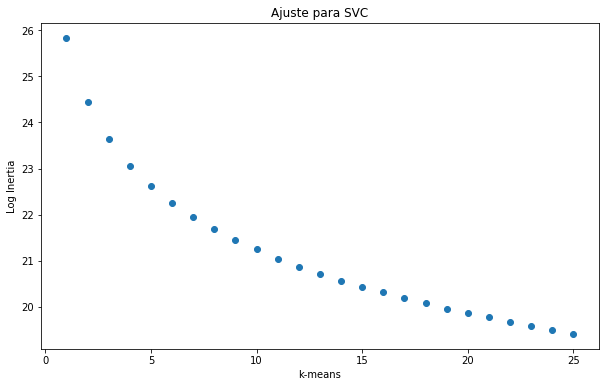

In [18]:
c1=np.arange(1,26)
plt.figure(figsize=(10,6))
plt.title("Ajuste para SVC")
plt.scatter(c1, np.log(score))
plt.xlabel("k-means")
plt.ylabel("Log Inertia")

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data2)
dataScaled=scaler.transform(data2)

/srv/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [20]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(dataScaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
acc=np.add.accumulate(pca.explained_variance_ratio_)
rang=np.arange(1,acc.shape[0]+1)

Text(0, 0.5, 'Cumulative Prop Variance Explained')

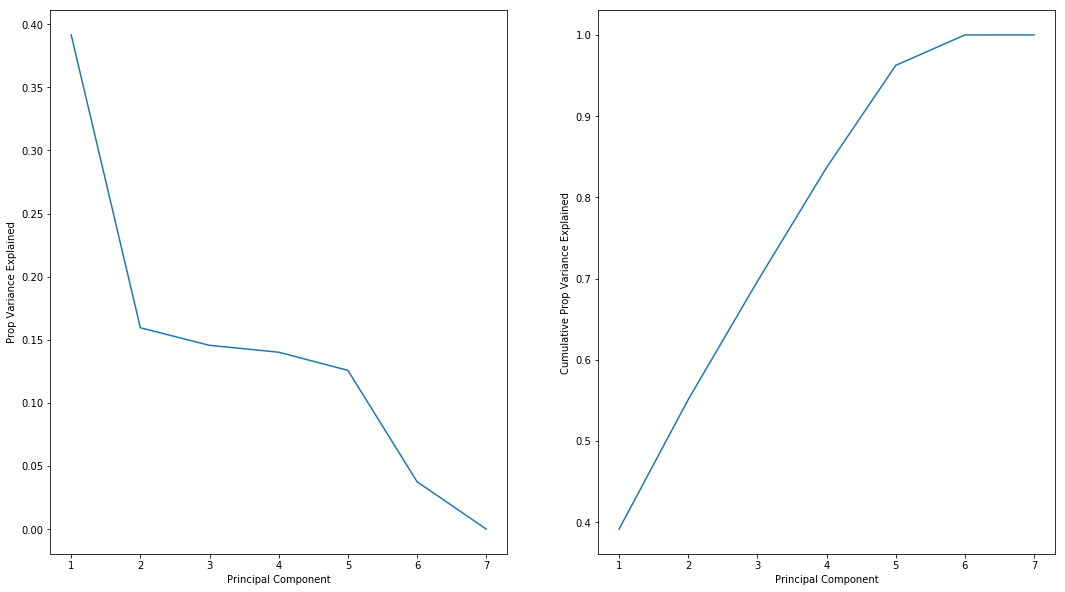

In [22]:
plt.figure(figsize=(18,10))
plt.subplot(1, 2, 1)
plt.plot(rang, pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Prop Variance Explained")

plt.subplot(1, 2, 2)
plt.plot(rang, acc)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Prop Variance Explained")

Text(0.5, 1.0, 'Componente principal 1 vs. componente principal 2')

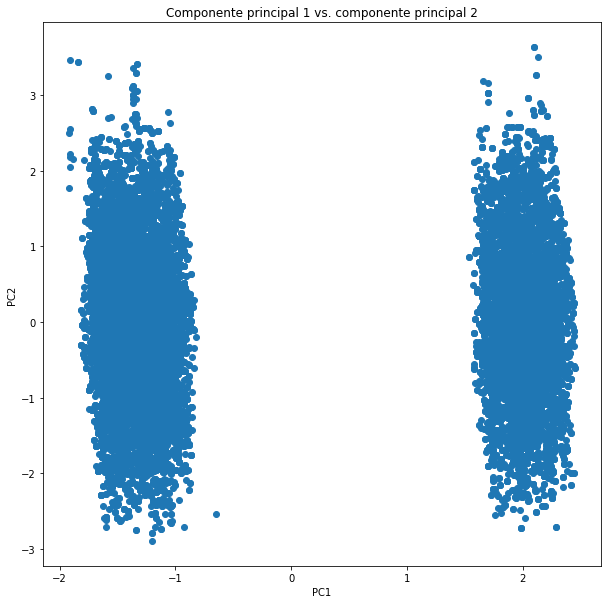

In [23]:
dataT=pca.transform(dataScaled)
plt.figure(figsize=(10,10))
plt.scatter(dataT[:,0], dataT[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Componente principal 1 vs. componente principal 2")

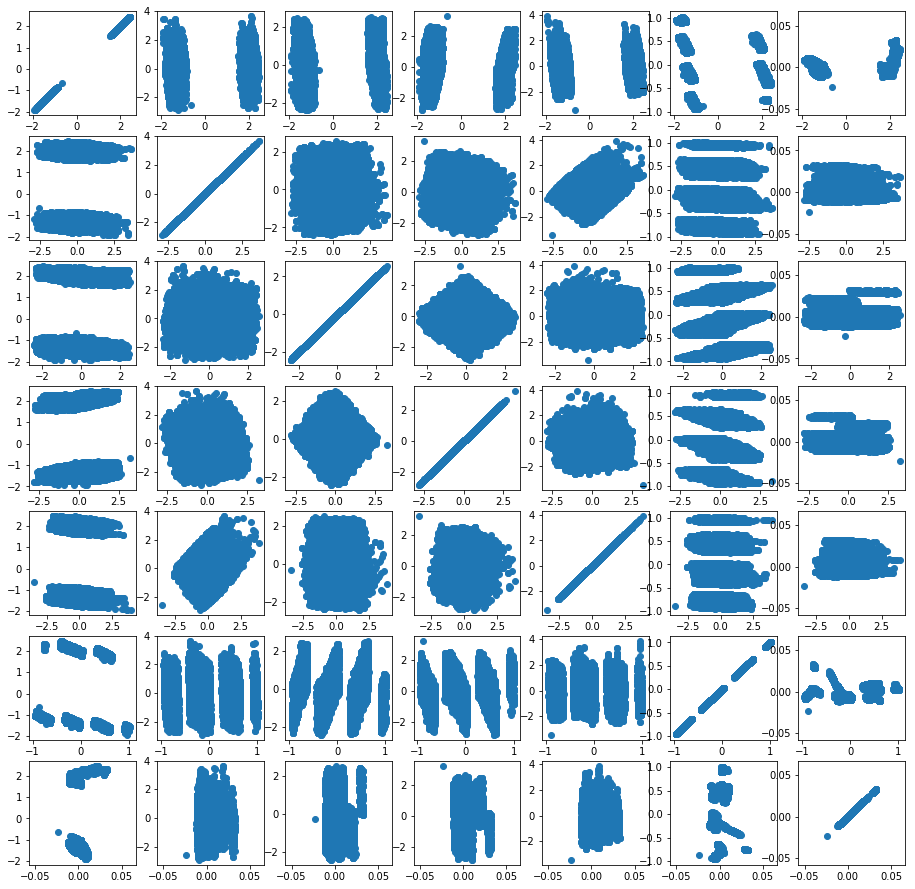

In [24]:
plt.figure(figsize=(18,18))
for i in range(acc.shape[0]):
    for j in range(acc.shape[0]):
        plt.subplot(acc.shape[0]+1, acc.shape[0]+1, i*(acc.shape[0]+1)+j+1)
        plt.scatter(dataT[:,i], dataT[:,j])

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['Item'])

LabelEncoder()

In [26]:
time=np.array(data['Hour'].astype(np.float))*3600+np.array(data['Min'].astype(np.float))*60+np.array(data['Sec'].astype(np.float))

data['Time']=time
data['Prod']=le.transform(data['Item'])

In [27]:
data['dates'] = pd.to_datetime(data['Date'])

data['dw'] = data['dates'].dt.day_name()

In [28]:
le1 = preprocessing.LabelEncoder()
le1.fit(data['dw'])

LabelEncoder()

In [29]:
list(le1.classes_)

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [30]:
data.dw.replace(['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], [1,2,3,4,5,6,7], inplace=True)

In [32]:
pca = PCA()

In [35]:
print(data.keys())

Index(['Date', 'Time', 'Transaction', 'Item', 'Year', 'Month', 'Day', 'Hour',
       'Min', 'Sec', 'Prod', 'dates', 'dw'],
      dtype='object')


In [42]:
pca.fit(data[['Time','Transaction','Month','Year']])
acc=np.add.accumulate(pca.explained_variance_ratio_)
rang=np.arange(1,acc.shape[0]+1)

Text(0, 0.5, 'Cumulative Prop Variance Explained')

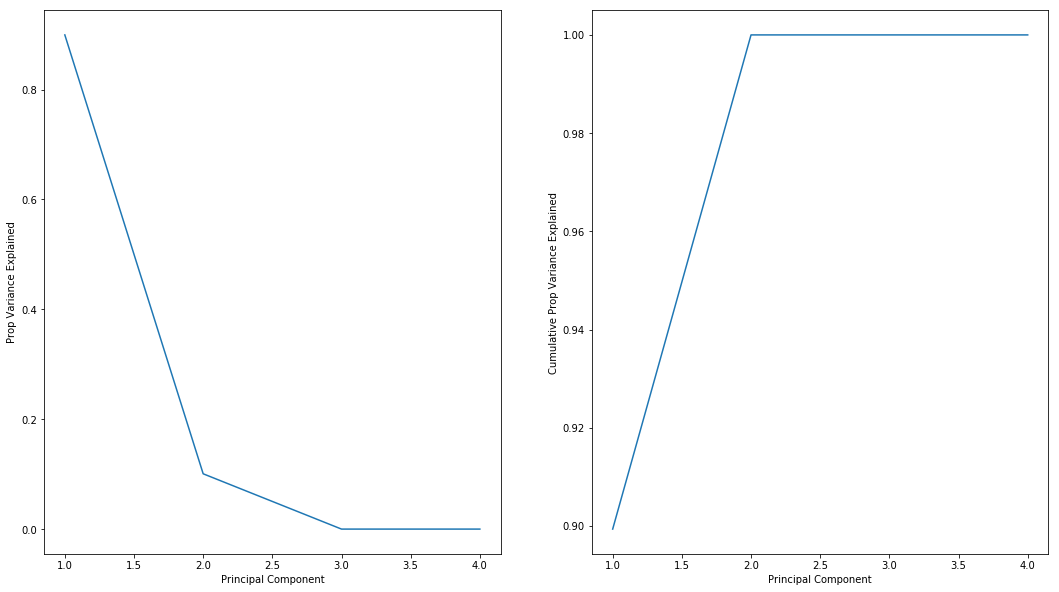

In [43]:
plt.figure(figsize=(18,10))
plt.subplot(1, 2, 1)
plt.plot(rang, pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Prop Variance Explained")

plt.subplot(1, 2, 2)
plt.plot(rang, acc)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Prop Variance Explained")

In [50]:
score=[]
for i in range(25):
    kmeans = KMeans(n_clusters=i+1).fit(data[['Time','Transaction','Month','Year']])
    score.append(kmeans.inertia_)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


Text(0, 0.5, 'Log Inertia')

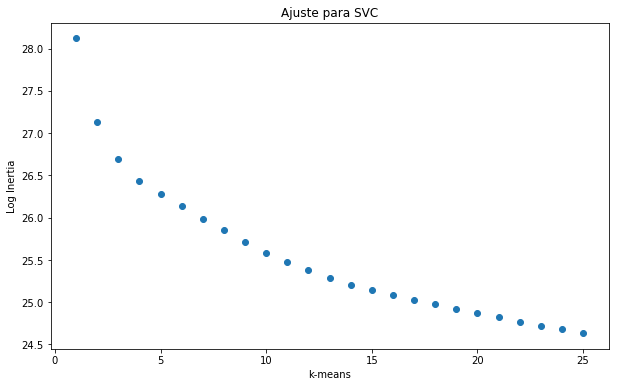

In [51]:
c1=np.arange(1,26)
plt.figure(figsize=(10,6))
plt.title("Ajuste para SVC")
plt.scatter(c1, np.log(score))
plt.xlabel("k-means")
plt.ylabel("Log Inertia")

In [52]:
pca.components_

array([[-9.99683812e-01, -2.51450742e-02,  3.65128843e-05,
        -4.14386535e-06],
       [ 2.51451005e-02, -9.99683039e-01,  1.23367810e-03,
        -1.50483285e-04],
       [-5.49113148e-06, -1.24249345e-03, -9.96457844e-01,
         8.40846085e-02],
       [ 1.03448194e-07, -4.62289247e-05,  8.40847305e-02,
         9.96458607e-01]])

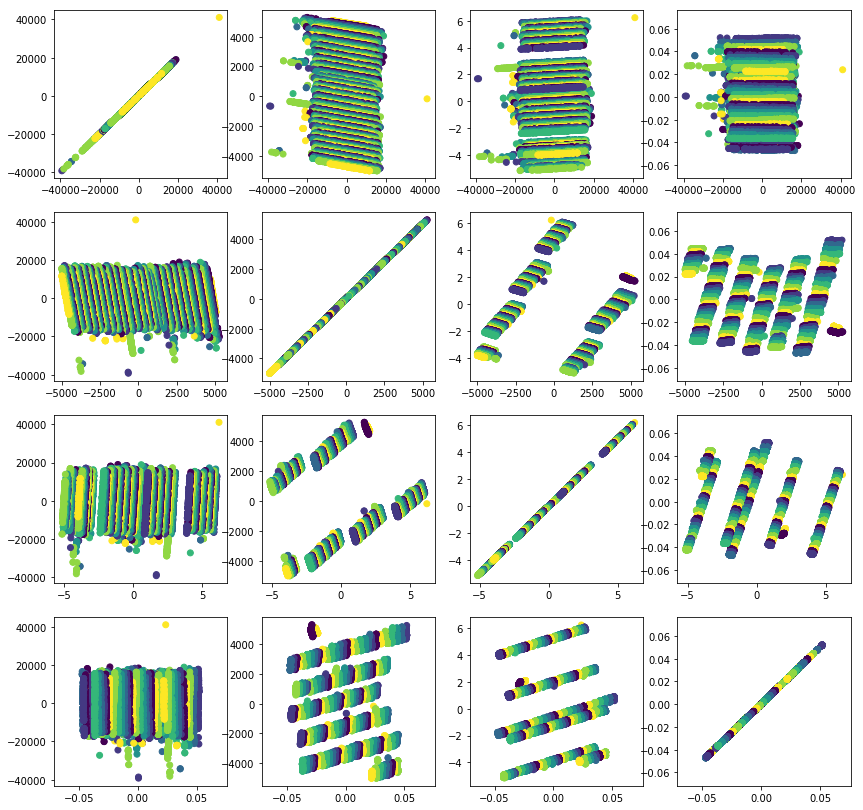

In [54]:
dataT=pca.transform(data[['Time','Transaction','Month','Year']])
plt.figure(figsize=(18,18))
for i in range(acc.shape[0]):
    for j in range(acc.shape[0]):
        plt.subplot(acc.shape[0]+1, acc.shape[0]+1, i*(acc.shape[0]+1)+j+1)
        plt.scatter(dataT[:,i], dataT[:,j],c=data['dw'])

In [55]:
#El color representa el dia de la semana

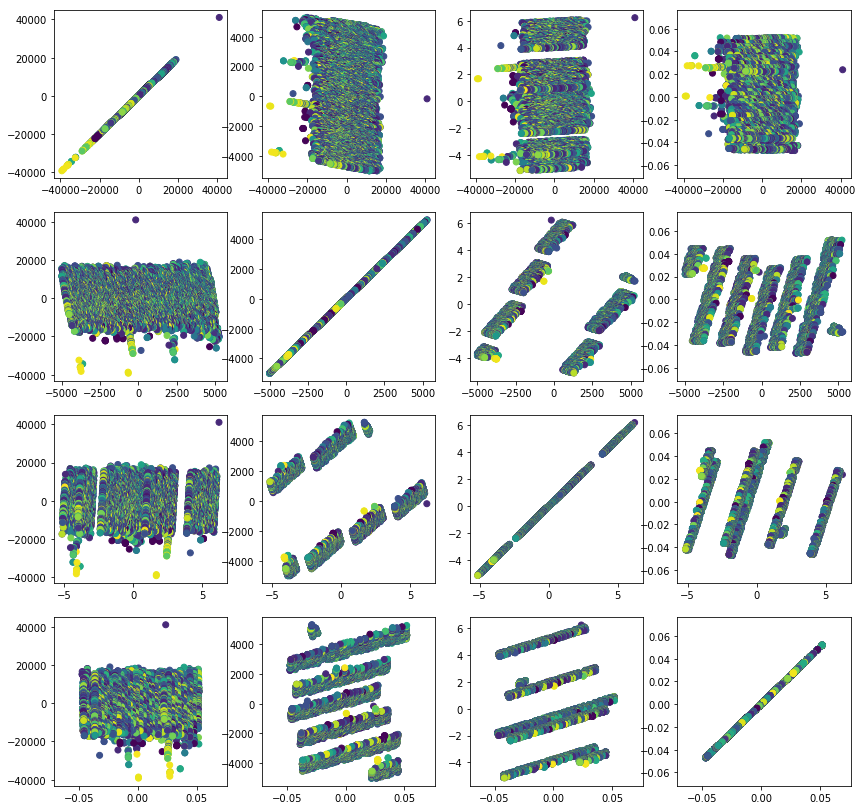

In [56]:
dataT=pca.transform(data[['Time','Transaction','Month','Year']])
plt.figure(figsize=(18,18))
for i in range(acc.shape[0]):
    for j in range(acc.shape[0]):
        plt.subplot(acc.shape[0]+1, acc.shape[0]+1, i*(acc.shape[0]+1)+j+1)
        plt.scatter(dataT[:,i], dataT[:,j],c=data['Prod'])

In [57]:
#El color es el tipo de producto

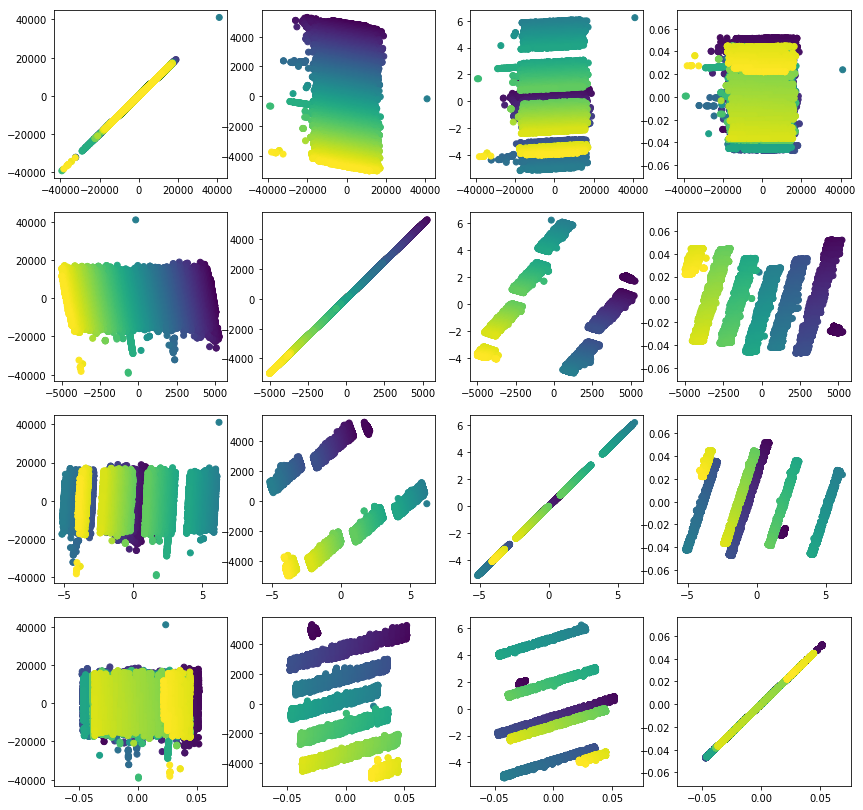

In [58]:
dataT=pca.transform(data[['Time','Transaction','Month','Year']])
plt.figure(figsize=(18,18))
for i in range(acc.shape[0]):
    for j in range(acc.shape[0]):
        plt.subplot(acc.shape[0]+1, acc.shape[0]+1, i*(acc.shape[0]+1)+j+1)
        plt.scatter(dataT[:,i], dataT[:,j],c=data['Transaction'])

In [59]:
#El color es el numero de transaccion